<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_23_hypothesis_testing_CalHousing_two_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Two-Sample T-Tests

#### **What is a T-Test?**
A **t-test** is a statistical method used to determine whether the means of two groups are significantly different from each other. It is a fundamental tool in hypothesis testing and allows analysts to make inferences about a population based on sample data.

The **two-sample t-test** is specifically designed to compare the means of two independent groups (e.g., coastal vs. inland regions) to determine if any observed differences are statistically significant.

---

#### **Why is a T-Test Important?**
In real-world data analysis, decision-making often relies on comparing two groups to understand whether observed differences are due to chance or represent a true difference in the population. The two-sample t-test provides a systematic and robust way to answer this question.

It’s particularly valuable in:
- **A/B Testing:** Comparing the performance of two marketing campaigns.
- **Medicine:** Testing the efficacy of two different treatments.
- **Business:** Analyzing customer satisfaction between two regions or product lines.
- **Environmental Studies:** Assessing differences in metrics like air quality or temperature between two locations.

---

#### **Steps to Conduct a Two-Sample T-Test**
1. **Formulate the Hypotheses:**
   - Null Hypothesis (H₀): The means of the two groups are equal.
   - Alternative Hypothesis (Hₐ): The means of the two groups are not equal.

2. **Check Assumptions:**
   - **Independence:** The two groups must be independent of each other.
   - **Normality:** Data should ideally follow a normal distribution (this is less critical for large samples due to the Central Limit Theorem).
   - **Equality of Variances:** Use Levene’s Test to check if the variances of the two groups are equal.

3. **Choose the Appropriate Test:**
   - If variances are equal, perform a **standard two-sample t-test**.
   - If variances are unequal, perform **Welch’s t-test**, which is robust to unequal variances.

4. **Compute the Test Statistic:**
   - The test statistic measures the difference between group means relative to the variability in the data. A large test statistic suggests a significant difference.

5. **Calculate the P-Value:**
   - The p-value indicates the probability of observing the data if the null hypothesis is true. A p-value below a pre-defined significance level (e.g., 0.05) leads to rejecting the null hypothesis.

6. **Interpret the Results:**
   - Based on the p-value, conclude whether there is sufficient evidence to support the alternative hypothesis.

---

#### **Real-World Examples**
- **Housing Market Analysis:**
   - Compare median house values between urban and rural areas to understand regional differences.
   - Assess differences in housing prices based on proximity to amenities like schools or parks.
   
- **E-Commerce:**
   - Analyze average order values between two customer segments (e.g., premium vs. standard users).

- **Healthcare:**
   - Determine if patients on two different medications have different recovery times.

- **Education:**
   - Compare test scores between two teaching methods or schools.

---

#### **Why Use a Two-Sample T-Test?**
The two-sample t-test is essential when comparing two independent groups because:
- It quantifies whether differences in sample means are statistically significant or likely due to random variation.
- It accounts for variability in the data, ensuring robust conclusions.
- It provides a clear framework for decision-making in a variety of domains.



### Load Calfiornia Housing Data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind

# Load California Housing dataset from sklearn
california_data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
data = california_data.frame

# Display dataset information
print("California Housing Dataset Info:")
data.info()

California Housing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Remove Outliers

In [3]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each column
df = data.copy()
for column in ['AveBedrms', 'AveRooms', 'AveOccup']:
    df = remove_outliers_iqr(df, column)

### Data Distribution Plots


Unique Values in Numeric Columns:
AveBedrms: 12617 unique values
AveOccup: 16948 unique values
AveRooms: 17341 unique values
HouseAge: 52 unique values
MedHouseVal: 3787 unique values
MedInc: 11988 unique values
Population: 3689 unique values


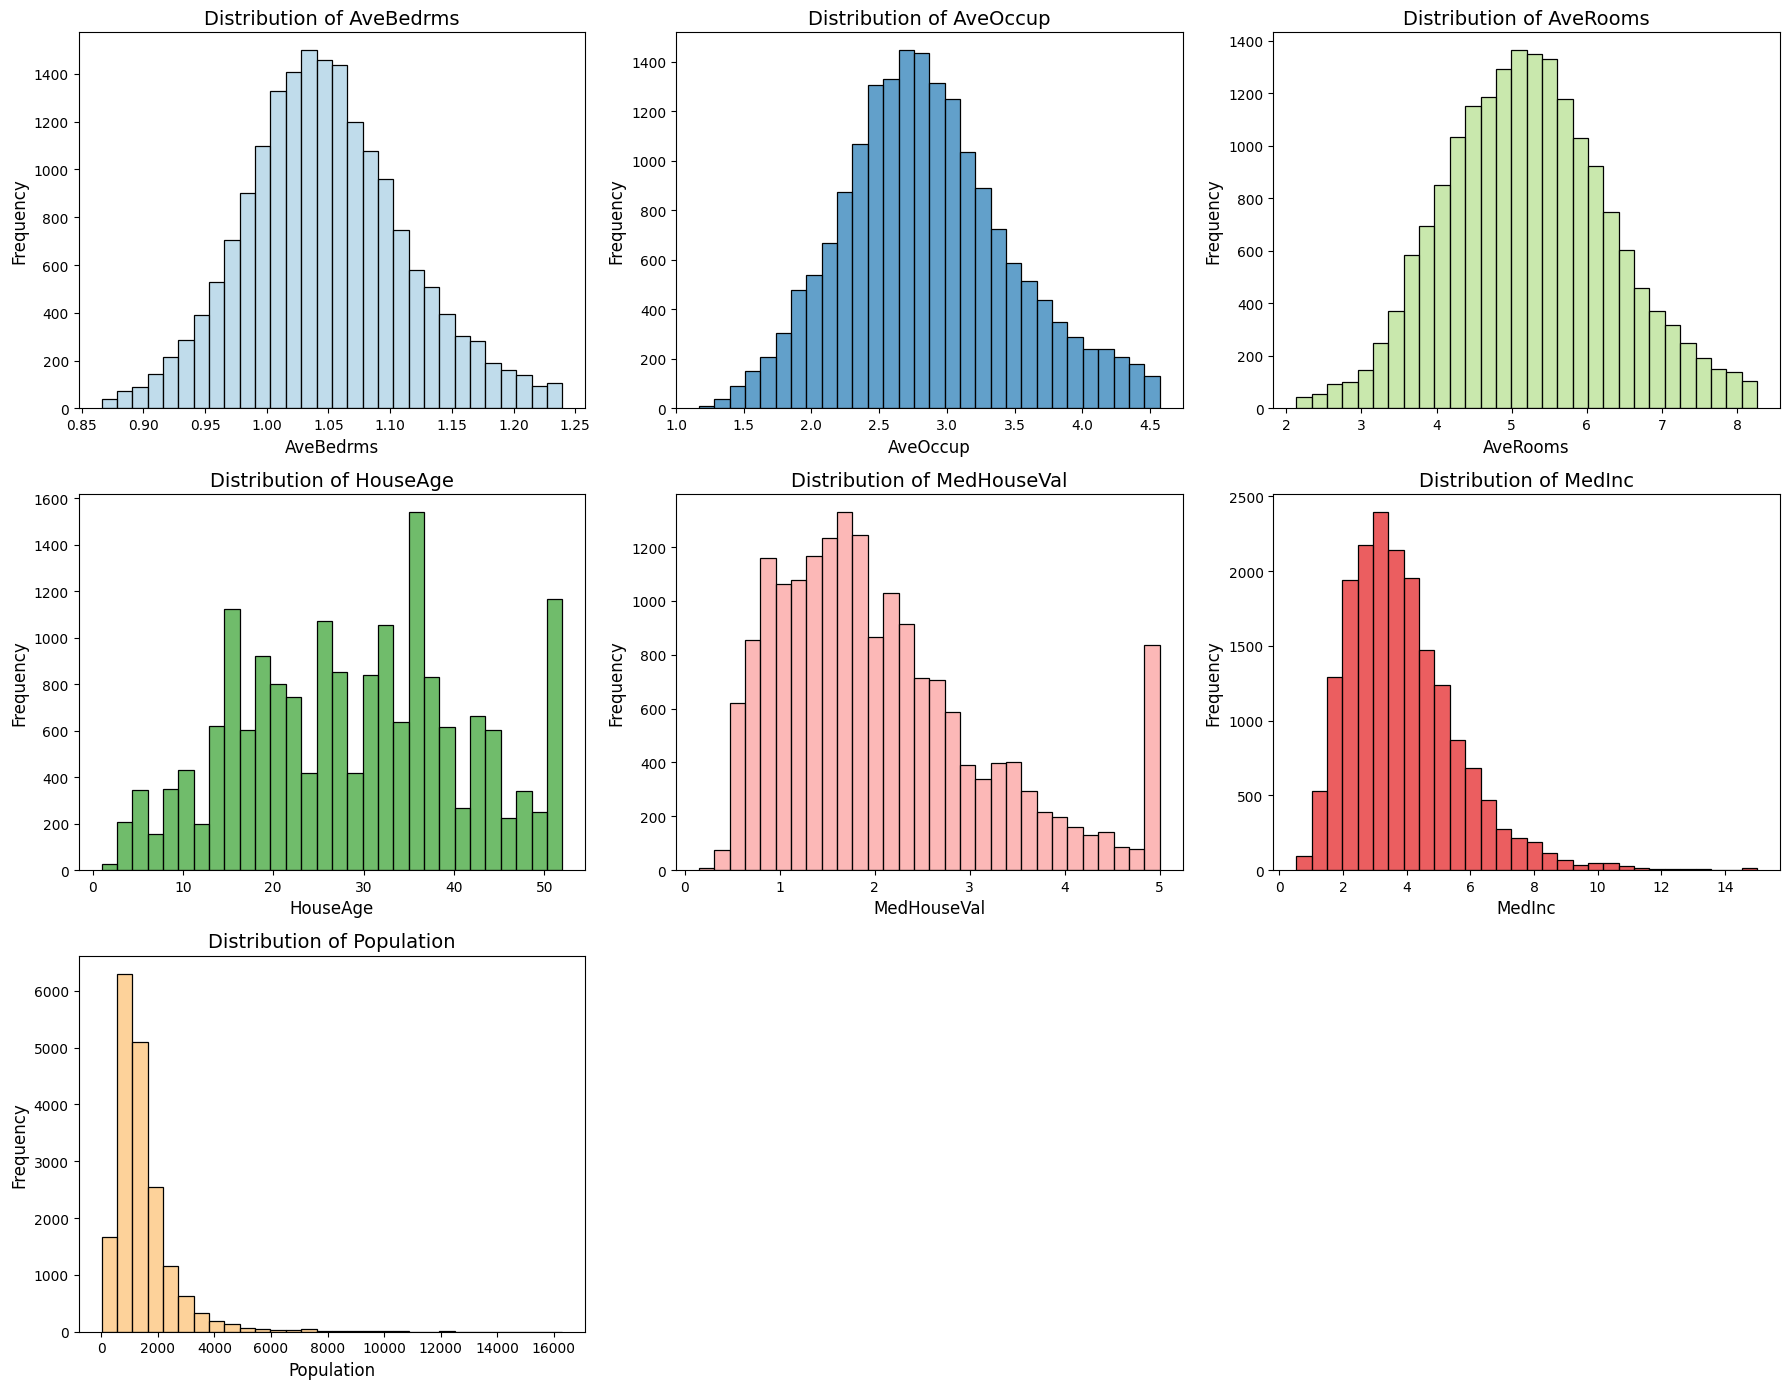

In [4]:
# Exclude 'longitude' and 'latitude' from analysis
numeric_columns = df.select_dtypes(include='number').columns.difference(['Longitude', 'Latitude'])

# Define a color palette for the plots
colors = sns.color_palette("Paired", n_colors=len(numeric_columns))

# Step 1: Count unique values for each numeric column
print("\nUnique Values in Numeric Columns:")
for col in numeric_columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Step 2: Visualize distributions of numeric columns
plt.figure(figsize=(18, 14))
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid to fit all plots
    sns.histplot(df[col], kde=False, bins=30, color=color, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

# Final adjustments for the layout
plt.tight_layout()
plt.show()

# # Step 3: Summary statistics for numeric columns
# print("\nSummary Statistics for Numeric Columns:")
# df[numeric_columns].describe()


### Example Scenarios for Two-Sample T-Tests

1. **Median House Value by Coastal vs. Inland Regions**
   - Question: Do median house values differ significantly between coastal and inland regions?
   - Hypotheses:
     - **H₀**: The mean median house values for coastal and inland regions are the same.
     - **Hₐ**: The mean median house values for coastal and inland regions are different.
   - Test Type: Two-sample t-test.

2. **Median Income by Older vs. Newer Houses**
   - Question: Does median income differ significantly between areas with older and newer houses?
   - Hypotheses:
     - **H₀**: The mean median income for areas with older and newer houses is the same.
     - **Hₐ**: The mean median income for areas with older and newer houses is different.
   - Test Type: Two-sample t-test.

3. **Median House Value by High vs. Low Population Density**
   - Question: Do median house values differ significantly between high and low population density areas?
   - Hypotheses:
     - **H₀**: The mean median house values for high and low population density areas are the same.
     - **Hₐ**: The mean median house values for high and low population density areas are different.
   - Test Type: Two-sample t-test.

4. **House Age by High vs. Low Median Income Areas**
   - Question: Are houses in higher-income areas significantly older than those in lower-income areas?
   - Hypotheses:
     - **H₀**: The mean house age for high and low median income areas is the same.
     - **Hₐ**: The mean house age for high and low median income areas is different.
   - Test Type: Two-sample t-test.


## Question:
Do median house values differ significantly between coastal and inland regions?

### Steps:
1. **Define Groups**:
   - Split the data into "coastal" and "inland" based on the **Longitude** column.
     - Coastal regions will be defined as Longitude > -119.
     - Inland regions will be defined as Longitude ≤ -119.
2. **Formulate Hypotheses**:
   - **H₀**: The mean median house values for coastal and inland regions are the same.
   - **Hₐ**: The mean median house values for coastal and inland regions are different.
3. **Perform the Two-Sample T-Test**:
   - Check for variance equality using Levene’s test.
   - Use Welch’s t-test if variances are unequal, or a standard t-test if variances are equal.
4. **Visualize**:
   - Use a boxplot and KDE plot to compare distributions.



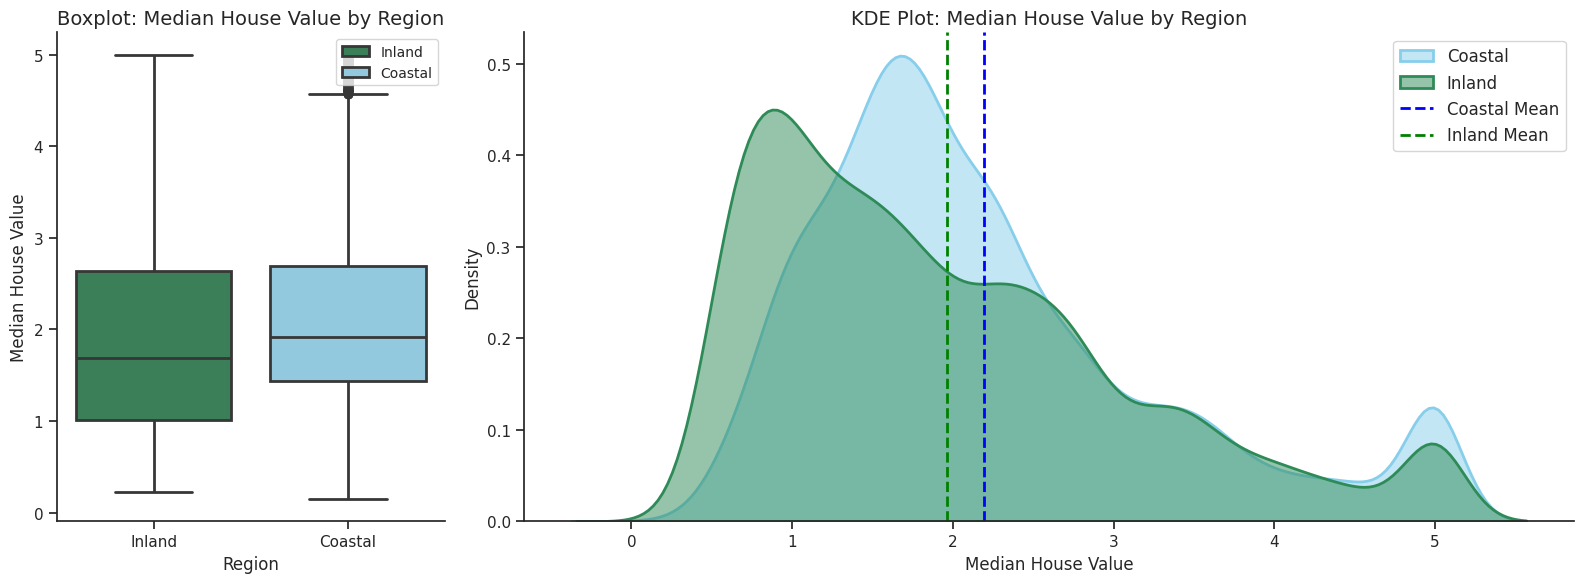

Levene's Test for Equality of Variances:
Test Statistic: 78.02, P-Value: 0.0000
Variances are unequal. Performing Welch's t-test.

Two-Sample T-Test Results:
T-Statistic: 13.88
P-Value: 0.0000
Conclusion: Reject H₀. Median house values differ significantly between coastal and inland regions.


In [5]:
import matplotlib.gridspec as gridspec

# Split the data into coastal and inland regions
coastal = df[df['Longitude'] > -119]['MedHouseVal']
inland = df[df['Longitude'] <= -119]['MedHouseVal']

# Set Seaborn theme
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 0.5])  # Allocate space: 1 part for boxplot, 2 parts for KDE plot

# Boxplot
ax1 = fig.add_subplot(gs[0])  # First subplot
sns.boxplot(data=df,
            x=pd.cut(df['Longitude'], bins=[df['Longitude'].min(), -119, df['Longitude'].max()],
                     labels=['Inland', 'Coastal']),
            y='MedHouseVal',
            hue=pd.cut(df['Longitude'], bins=[df['Longitude'].min(), -119, df['Longitude'].max()],
                     labels=['Inland', 'Coastal']),
            palette=['seagreen', 'skyblue'], linewidth=2, ax=ax1)
ax1.set_title("Boxplot: Median House Value by Region", fontsize=14)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Median House Value", fontsize=12)
ax1.legend(loc="upper right", fontsize=10)

# KDE Plot
ax2 = fig.add_subplot(gs[1:])  # Remaining space for KDE plot
sns.kdeplot(coastal, fill=True, alpha=0.5, color="skyblue", linewidth=2, label="Coastal", ax=ax2)
sns.kdeplot(inland, fill=True, alpha=0.5, color="seagreen", linewidth=2, label="Inland", ax=ax2)
ax2.axvline(coastal.mean(), color="blue", linestyle="--", linewidth=2, label="Coastal Mean")
ax2.axvline(inland.mean(), color="green", linestyle="--", linewidth=2, label="Inland Mean")
ax2.set_title("KDE Plot: Median House Value by Region", fontsize=14)
ax2.set_xlabel("Median House Value", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.legend(fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()


# Levene's Test for Equality of Variances
levene_stat, levene_p = levene(coastal, inland)

# Two-sample t-test (Welch's if variances are unequal)
t_stat, p_value = ttest_ind(coastal, inland, equal_var=(levene_p > 0.05))

# Results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}, P-Value: {levene_p:.4f}")
if levene_p > 0.05:
    print("Variances are equal. Performing standard t-test.")
else:
    print("Variances are unequal. Performing Welch's t-test.")

print("\nTwo-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value <= 0.05:
    print("Conclusion: Reject H₀. Median house values differ significantly between coastal and inland regions.")
else:
    print("Conclusion: Fail to reject H₀. No significant difference in median house values between coastal and inland regions.")


### Interpretation of Results:

1. **Levene's Test Results**:
   - **Test Statistic**: 78.02
   - **P-Value**: 0.0000
   - Since the p-value is less than 0.05, we reject the null hypothesis of equal variances.
   - Conclusion: Variances are significantly different between the coastal and inland groups, so Welch's t-test is the appropriate test to use here.

2. **Welch's T-Test Results**:
   - **T-Statistic**: 13.88
   - **P-Value**: 0.0000
   - The t-statistic is highly significant, and the p-value is far below the 0.05 threshold. This indicates strong evidence to reject the null hypothesis.
   - **Conclusion**: Median house values differ significantly between coastal and inland regions.

3. **Effect Size and Practical Meaning**:
   - The test confirms a statistically significant difference in median house values between the two regions.
   - Coastal regions have significantly higher median house values compared to inland regions (this can also be seen in the KDE plot and boxplot).
   - This result aligns with real-world expectations, as coastal properties are often more expensive due to their desirable location.




## **Question**:
Is the average median income significantly different between homes located in coastal regions versus inland regions?

---

#### **Hypotheses**:
- **Null Hypothesis (H₀)**: Median incomes are equal between coastal and inland regions.
- **Alternative Hypothesis (H₁)**: Median incomes differ significantly between coastal and inland regions.

---

#### **Approach**:
1. **Levene's Test for Equality of Variances**:
   - Check if variances between the two groups (coastal and inland) are equal.
2. **Two-Sample T-Test**:
   - Perform Welch's t-test if variances are unequal (based on Levene's test result).
   - Otherwise, perform a standard t-test.







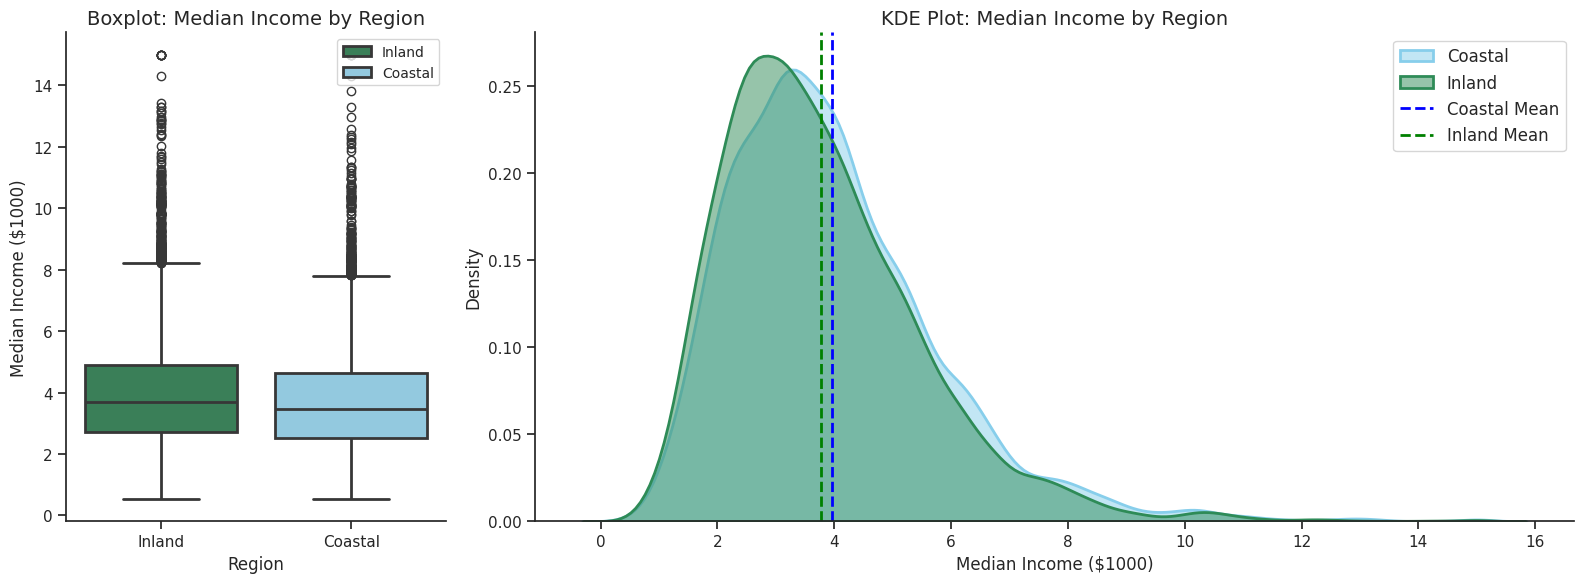

Levene's Test for Equality of Variances:
Test Statistic: 7.51, P-Value: 0.0061
Variances are unequal. Performing Welch's t-test.

Two-Sample T-Test Results:
Coastal Mean: 3.97, Inland Mean: 3.77
T-Statistic: 7.58
P-Value: 0.0000
Conclusion: Reject H₀. Median incomes differ significantly between coastal and inland regions.


In [6]:
# Define coastal and inland groups
# coastal_income = df[df['Latitude'] > 35]['MedInc']  # Latitude > 35 for coastal approximation
# inland_income = df[df['Latitude'] <= 35]['MedInc']  # Latitude <= 35 for inland approximation

coastal_income = df[df['Longitude'] > -119]['MedInc']
inland_income = df[df['Longitude'] <= -119]['MedInc']

# Perform Levene's Test for Equality of Variances
levene_stat, levene_p = levene(coastal_income, inland_income)

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 0.5])  # Allocate space: 1 part for boxplot, 2 parts for KDE plot

# Boxplot
ax1 = fig.add_subplot(gs[0])  # First subplot
sns.boxplot(data=df,
            x=pd.cut(df['Latitude'], bins=[df['Latitude'].min(), 35, df['Latitude'].max()],
                     labels=["Inland", "Coastal"]),
            y="MedInc",
            hue=pd.cut(df['Latitude'], bins=[df['Latitude'].min(), 35, df['Latitude'].max()],
                     labels=["Inland", "Coastal"]),
            palette=["seagreen", "skyblue"],
            linewidth=2, ax=ax1)
ax1.set_title("Boxplot: Median Income by Region", fontsize=14)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Median Income ($1000)", fontsize=12)
ax1.legend(loc="upper right", fontsize=10)

# KDE Plot
ax2 = fig.add_subplot(gs[1:])  # Remaining space for KDE plot
sns.kdeplot(coastal_income, fill=True, alpha=0.5, label="Coastal", color="skyblue", linewidth=2, ax=ax2)
sns.kdeplot(inland_income, fill=True, alpha=0.5, label="Inland", color="seagreen", linewidth=2, ax=ax2)
ax2.axvline(coastal_income.mean(), color="blue", linestyle="--", linewidth=2, label="Coastal Mean")
ax2.axvline(inland_income.mean(), color="green", linestyle="--", linewidth=2, label="Inland Mean")
ax2.set_title("KDE Plot: Median Income by Region", fontsize=14)
ax2.set_xlabel("Median Income ($1000)", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.legend(fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()

# Print Levene's Test Results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}, P-Value: {levene_p:.4f}")

# Perform the appropriate T-Test based on Levene's test
if levene_p < 0.05:
    print("Variances are unequal. Performing Welch's t-test.")
    t_stat, p_value = ttest_ind(coastal_income, inland_income, equal_var=False)
else:
    print("Variances are equal. Performing standard t-test.")
    t_stat, p_value = ttest_ind(coastal_income, inland_income, equal_var=True)

# Print T-Test Results
print("\nTwo-Sample T-Test Results:")
print(f"Coastal Mean: {coastal_income.mean():.2f}, Inland Mean: {inland_income.mean():.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


# Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H₀. Median incomes differ significantly between coastal and inland regions.")
else:
    print("Conclusion: Fail to reject H₀. No significant difference in median incomes between coastal and inland regions.")


#### **Interpretation of Results**

#### **Levene's Test for Equality of Variances**
- **Test Statistic:** 7.51
- **P-Value:** 0.0061 (less than the significance level, usually \( \alpha = 0.05 \))

**Interpretation:**  
Levene's test indicates that the variances of the median incomes for coastal and inland regions are significantly different (\( p < 0.05 \)). This means that the assumption of equal variances is violated, so we must use **Welch's t-test**, which is robust to unequal variances.

---

#### **Welch's T-Test Results**
- **Coastal Mean:** 3.97 (Average median income in coastal areas)
- **Inland Mean:** 3.77 (Average median income in inland areas)
- **T-Statistic:** 7.58 (A high absolute t-value, indicating a substantial difference between group means)
- **P-Value:** 0.0000 (less than the significance level \( \alpha = 0.05 \))

**Interpretation:**  
Welch's t-test shows a highly significant result (\( p < 0.05 \)), leading us to **reject the null hypothesis (\( H_0 \))**. This means that there is strong evidence to suggest that the **average median incomes differ significantly** between coastal and inland regions.

---

#### **Practical Implication**
- The **coastal region** has a slightly higher average median income (\$3,970) compared to the **inland region** (\$3,770).
- While the absolute difference (\$200) may not seem substantial, the statistical test accounts for sample size and variance, confirming that this difference is unlikely to have occurred by chance.

---

#### **Why the Results Are Significant**
1. **Large Sample Size:** Both coastal and inland regions likely have a large number of observations, reducing standard error and increasing statistical power.
2. **Small Variance:** Although variances are unequal, the spread within each group is not extreme, making the means more stable and the test more sensitive.
3. **Practical Use:** This difference could be relevant for understanding socioeconomic patterns, housing policies, or investment opportunities in these regions.




## **Question**
### **House Age and Median House Value**
Do older houses (above the median age) have significantly different median house values compared to newer houses (below the median age)?

#### **Approach**
- Split the dataset into two groups based on the median house age.
- Perform **Levene's test** to check for equality of variances.
- Use a **two-sample t-test** (Welch's t-test if variances are unequal) to compare the median house values between the two groups.




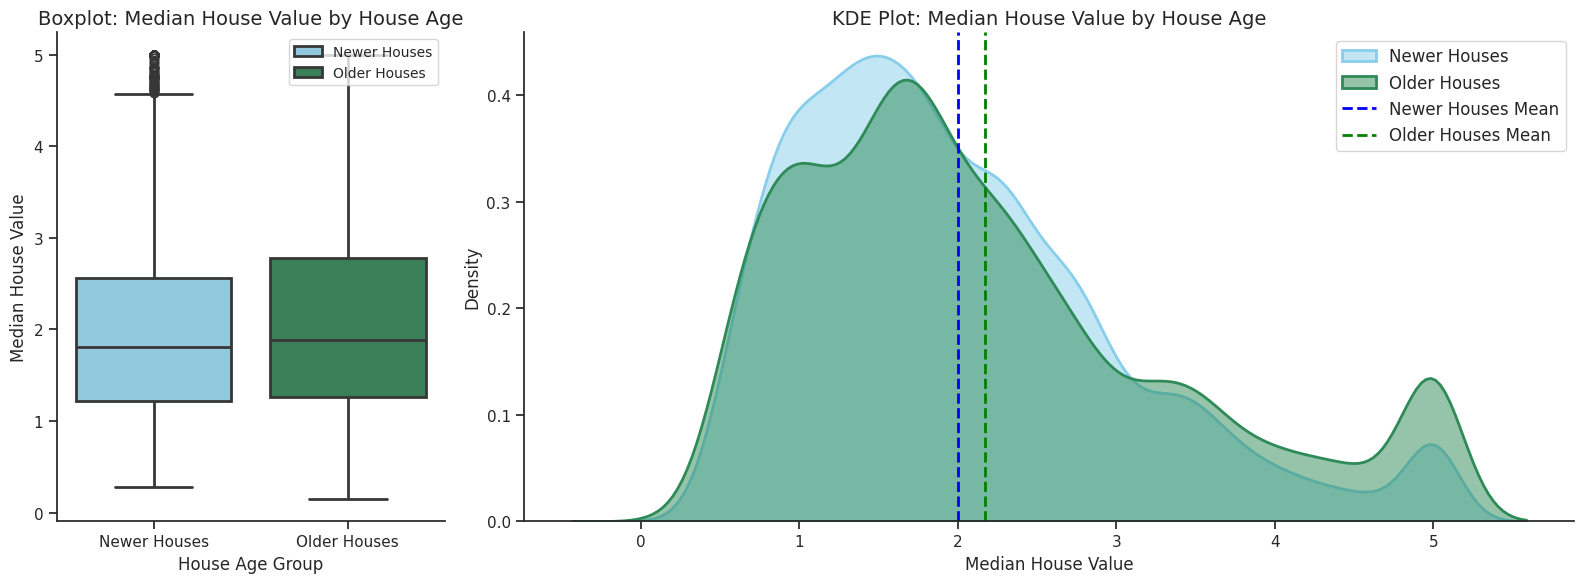

Levene's Test for Equality of Variances:
Test Statistic: 138.84, P-Value: 0.0000

Variances are unequal. Performing Welch's T-Test.

Two-Sample T-Test Results:
Newer Houses Mean: 2.00, Older Houses Mean: 2.17
T-Statistic: -10.07
P-Value: 0.0000
Conclusion: Reject H₀. Median house values differ significantly between newer and older houses.


In [9]:
# Calculate the median house age
median_age = df['HouseAge'].median()

# Define groups: newer and older houses
newer_houses = df[df['HouseAge'] <= median_age]['MedHouseVal']
older_houses = df[df['HouseAge'] > median_age]['MedHouseVal']

# Visualization: Boxplot and KDE Plot
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 0.5])  # Allocate space: 1 part for boxplot, 2 parts for KDE plot

# Boxplot
ax1 = fig.add_subplot(gs[0])  # First subplot
sns.boxplot(data=df,
            x=pd.cut(df['HouseAge'], bins=[df['HouseAge'].min(), median_age, df['HouseAge'].max()],
                     labels=["Newer Houses", "Older Houses"]),
            y="MedHouseVal",
            hue=pd.cut(df['HouseAge'], bins=[df['HouseAge'].min(), median_age, df['HouseAge'].max()],
                     labels=["Newer Houses", "Older Houses"]),
            palette=["skyblue", "seagreen"],
            linewidth=2, ax=ax1)
ax1.set_title("Boxplot: Median House Value by House Age", fontsize=14)
ax1.set_xlabel("House Age Group", fontsize=12)
ax1.set_ylabel("Median House Value", fontsize=12)
ax1.legend(loc="upper right", fontsize=10)

# KDE Plot
ax2 = fig.add_subplot(gs[1:])  # Remaining space for KDE plot
sns.kdeplot(newer_houses, fill=True, alpha=0.5, label="Newer Houses", color="skyblue", linewidth=2, ax=ax2)
sns.kdeplot(older_houses, fill=True, alpha=0.5, label="Older Houses", color="seagreen", linewidth=2, ax=ax2)
ax2.axvline(newer_houses.mean(), color="blue", linestyle="--", linewidth=2, label="Newer Houses Mean")
ax2.axvline(older_houses.mean(), color="green", linestyle="--", linewidth=2, label="Older Houses Mean")
ax2.set_title("KDE Plot: Median House Value by House Age", fontsize=14)
ax2.set_xlabel("Median House Value", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.legend(fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()

# Perform Levene's Test for Equality of Variances
levene_stat, levene_p = levene(newer_houses, older_houses)
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}, P-Value: {levene_p:.4f}")

# Check variance equality and perform the appropriate t-test
if levene_p > 0.05:
    t_stat, p_value = ttest_ind(newer_houses, older_houses, equal_var=True)
    print("\nVariances are equal. Performing Standard Two-Sample T-Test.")
else:
    t_stat, p_value = ttest_ind(newer_houses, older_houses, equal_var=False)
    print("\nVariances are unequal. Performing Welch's T-Test.")

# Print T-Test Results
print("\nTwo-Sample T-Test Results:")
print(f"Newer Houses Mean: {newer_houses.mean():.2f}, Older Houses Mean: {older_houses.mean():.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation based on the p-value
if p_value < 0.05:
    print("Conclusion: Reject H₀. Median house values differ significantly between newer and older houses.")
else:
    print("Conclusion: Fail to reject H₀. Median house values do not differ significantly between newer and older houses.")



## **Question**
### **Population and Median House Value**
Do areas with smaller populations (below the median population) have significantly different median house values compared to areas with larger populations (above the median population)?

#### **Approach**
- Split the dataset into two groups based on the median population.
- Perform **Levene's test** to check for equality of variances.
- Use a **two-sample t-test** (Welch's t-test if variances are unequal) to compare the median house values between the two groups.



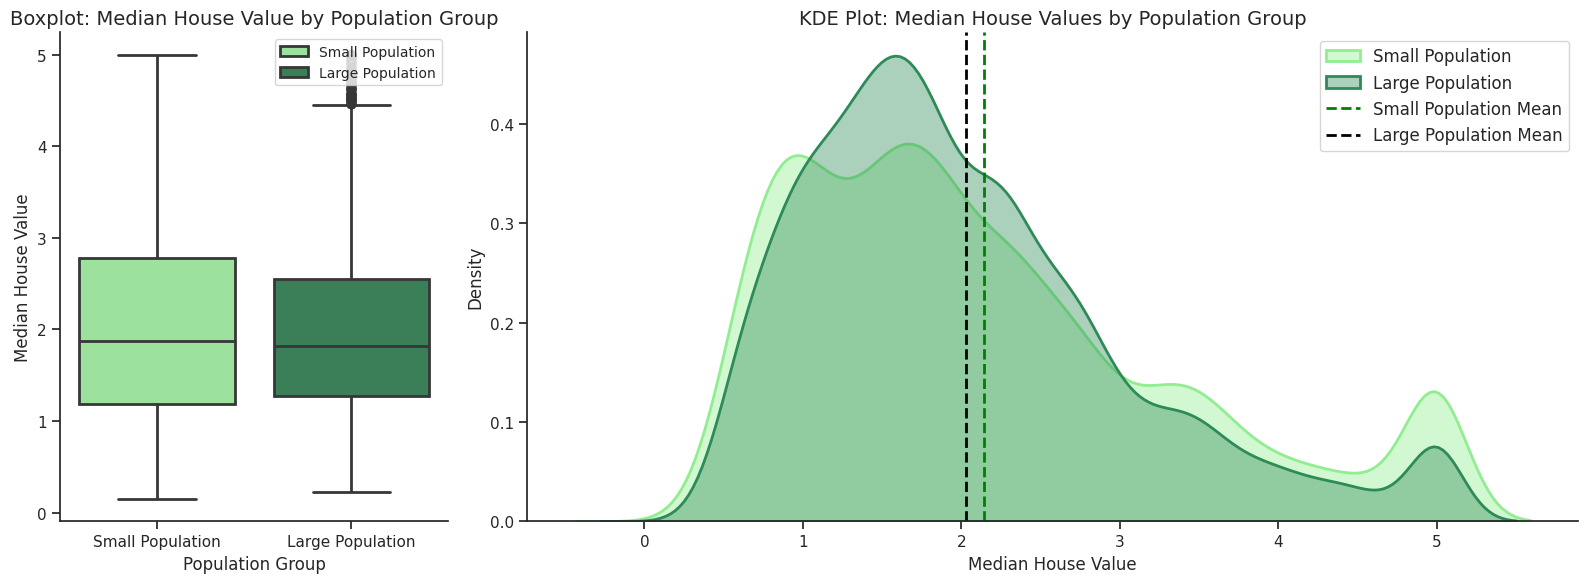

Levene's Test for Equality of Variances:
Test Statistic: 201.93, P-Value: 0.0000

Variances are unequal. Performing Welch's T-Test.

Two-Sample T-Test Results:
Small Population Mean: 2.15, Large Population Mean: 2.03
T-Statistic: 7.03
P-Value: 0.0000
Conclusion: Reject H₀. Median house values differ significantly between areas with smaller and larger populations.


In [10]:
# Define median population
median_population = df['Population'].median()

# Define groups: small and large populations
small_population = df[df['Population'] <= median_population]['MedHouseVal']
large_population = df[df['Population'] > median_population]['MedHouseVal']

# Visualization: Boxplot and KDE Plot
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 0.5])  # Allocate space: 1 part for boxplot, 2 parts for KDE plot

# Boxplot
ax1 = fig.add_subplot(gs[0])  # First subplot for boxplot
sns.boxplot(data=df,
            x=pd.cut(df['Population'], bins=[df['Population'].min(), median_population, df['Population'].max()],
                     labels=["Small Population", "Large Population"]),
            y="MedHouseVal",
            hue=pd.cut(df['Population'], bins=[df['Population'].min(), median_population, df['Population'].max()],
                     labels=["Small Population", "Large Population"]),
            palette=["lightgreen", "seagreen"],
            linewidth=2, ax=ax1)
ax1.set_title("Boxplot: Median House Value by Population Group", fontsize=14)
ax1.set_xlabel("Population Group", fontsize=12)
ax1.set_ylabel("Median House Value", fontsize=12)
ax1.legend(loc="upper right", fontsize=10)

# KDE Plot
ax2 = fig.add_subplot(gs[1:])  # Remaining space for KDE plot
sns.kdeplot(small_population, fill=True, alpha=0.4, label="Small Population", color="lightgreen", linewidth=2, ax=ax2)
sns.kdeplot(large_population, fill=True, alpha=0.4, label="Large Population", color="seagreen", linewidth=2, ax=ax2)
ax2.axvline(small_population.mean(), color="green", linestyle="--", linewidth=2, label="Small Population Mean")
ax2.axvline(large_population.mean(), color="black", linestyle="--", linewidth=2, label="Large Population Mean")
ax2.set_title("KDE Plot: Median House Values by Population Group", fontsize=14)
ax2.set_xlabel("Median House Value", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.legend(fontsize=12)

# Final adjustments
sns.despine()
plt.tight_layout()
plt.show()


# Perform Levene's Test for Equality of Variances
levene_stat, levene_p = levene(small_population, large_population)
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {levene_stat:.2f}, P-Value: {levene_p:.4f}")

# Check variance equality and perform the appropriate t-test
if levene_p > 0.05:
    t_stat, p_value = ttest_ind(small_population, large_population, equal_var=True)
    print("\nVariances are equal. Performing Standard Two-Sample T-Test.")
else:
    t_stat, p_value = ttest_ind(small_population, large_population, equal_var=False)
    print("\nVariances are unequal. Performing Welch's T-Test.")

# Print T-Test Results
print("\nTwo-Sample T-Test Results:")
print(f"Small Population Mean: {small_population.mean():.2f}, Large Population Mean: {large_population.mean():.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation based on the p-value
if p_value < 0.05:
    print("Conclusion: Reject H₀. Median house values differ significantly between areas with smaller and larger populations.")
else:
    print("Conclusion: Fail to reject H₀. Median house values do not differ significantly between areas with smaller and larger populations.")
